In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data.head()

,Unnamed: 0,Day_of_Week,Light_Conditions,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Age_of_Vehicle,Engine_Capacity_.CC.,Skidding_and_Overturning,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Hrs_category,Accident_Severity
0,0,Wednesday,Darkness - lights lit,1,1,Dry,Dual carriageway,30.0,Urban,Fine no high winds,3.0,8268.0,None,None,None,4,Slight
1,1,Thursday,Darkness - lights lit,1,2,Dry,Single carriageway,30.0,Urban,Fine no high winds,5.0,8300.0,None,Parked vehicle,None,1,Slight
2,2,Friday,Daylight,1,1,Dry,Single carriageway,30.0,Urban,Fine no high winds,4.0,1769.0,None,None,None,2,Slight
3,3,Monday,Darkness - lighting unknown,1,1,Wet or damp,Single carriageway,30.0,Urban,Fine no high winds,10.0,85.0,Skidded,Kerb,None,5,Slight
4,4,Tuesday,Daylight,1,2,Wet or damp,Single carriageway,30.0,Urban,Raining no high winds,1.0,2976.0,None,None,None,3,Slight


In [ ]:
y = data['Accident_Severity']
X = data.iloc[:,:-1]

In [ ]:
data.isnull().sum()

Unnamed: 0                    0
Day_of_Week                   0
Light_Conditions              0
Number_of_Casualties          0
Number_of_Vehicles            0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Urban_or_Rural_Area           0
Weather_Conditions            0
Age_of_Vehicle                0
Engine_Capacity_.CC.          0
Skidding_and_Overturning      0
Hit_Object_in_Carriageway     0
Hit_Object_off_Carriageway    0
Hrs_category                  0
Accident_Severity             0
dtype: int64

In [ ]:
oe = OrdinalEncoder()
oe.fit(X)
X = oe.transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify = y)


In [ ]:
feat = SelectKBest(score_func=chi2, k='all')
feat.fit(X_train, y_train)
X_train = feat.transform(X_train)
X_test = feat.transform(X_test)


# RF without SMOTE

In [ ]:
forest = RandomForestClassifier(random_state=4, criterion='gini', n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=4)

In [ ]:
pred = forest.predict(X_test)

In [ ]:
report = classification_report(y_test, pred)
print('Classification Report Random Forest - SMOTE Upsampling: \n', report)

Classification Report Random Forest - SMOTE Upsampling: 
               precision    recall  f1-score   support

       Fatal       0.63      0.04      0.08       631
     Serious       0.48      0.06      0.10      4751
      Slight       0.87      0.99      0.93     33974

    accuracy                           0.86     39356
   macro avg       0.66      0.36      0.37     39356
weighted avg       0.82      0.86      0.81     39356



# RF with SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
smote_data = pd.read_csv("gdrive/MyDrive/EMOPIA_2.2/smote_data.csv")

Mounted at /content/gdrive


In [ ]:
smote_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105335 entries, 0 to 4105334
Data columns (total 17 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   0                  float64
 2   1                  float64
 3   2                  float64
 4   3                  float64
 5   4                  float64
 6   5                  float64
 7   6                  float64
 8   7                  float64
 9   8                  float64
 10  9                  float64
 11  10                 float64
 12  11                 float64
 13  12                 float64
 14  13                 float64
 15  14                 float64
 16  Accident_Severity  object 
dtypes: float64(15), int64(1), object(1)
memory usage: 532.5+ MB


In [ ]:
ys = smote_data['Accident_Severity']
Xs = smote_data.iloc[:,:-1]
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=1)

In [ ]:
forest = RandomForestClassifier(random_state=4, criterion='gini', n_jobs=-1)
forest.fit(Xs_train, ys_train)

RandomForestClassifier(n_jobs=-1, random_state=4)

In [ ]:
pred = forest.predict(Xs_test)

In [ ]:
report = classification_report(ys_test, pred)
print('Classification Report Random Forest - SMOTE Upsampling: \n', report)

Classification Report Random Forest - SMOTE Upsampling: 
               precision    recall  f1-score   support

       Fatal       1.00      0.99      0.99    273658
     Serious       0.99      0.86      0.92    273666
      Slight       0.87      0.99      0.93    273743

    accuracy                           0.95    821067
   macro avg       0.95      0.95      0.95    821067
weighted avg       0.95      0.95      0.95    821067



In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Feature importance and Results

In [ ]:
from yellowbrick.model_selection import feature_importances, CVScores, RFECV, FeatureImportances
import matplotlib.pyplot as plt

In [ ]:
def getFeatureImportance(model, X, y):
    viz = FeatureImportances(model, labels = list(data.columns))
    viz.fit(X, y)

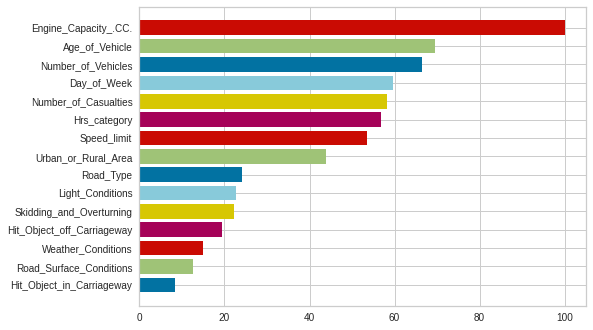

In [ ]:
getFeatureImportance(forest, Xs, ys)

### Coorelation between the important features and severity\

Text(0.5, 1.0, 'Engine Capacity Mean for different accident severities')

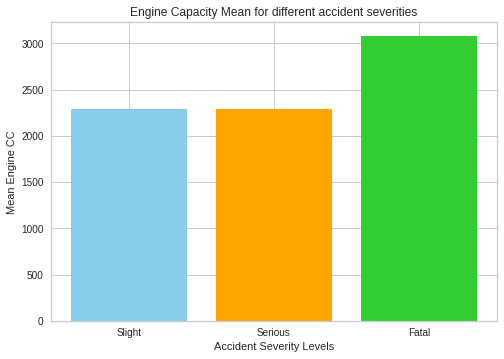

In [ ]:
arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[data.loc[data['Accident_Severity']==i,'Engine_Capacity_.CC.'].mean()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means=pd.DataFrame(data=d)
plt.bar(eng_means['Accident_Severity'],eng_means['Mean'],color=['SkyBlue','Orange','LimeGreen'])
plt.ylabel('Mean Engine CC')
plt.xlabel('Accident Severity Levels')
plt.title('Engine Capacity Mean for different accident severities')

Text(0.5, 1.0, 'Mean Speed Limit vs Accident severities')

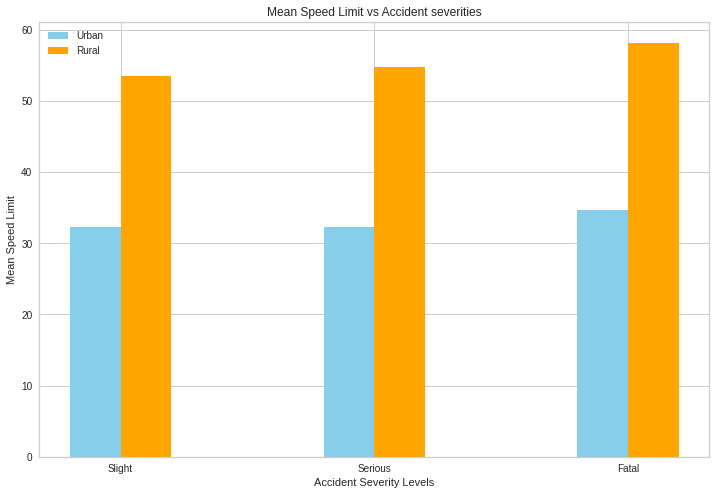

In [ ]:

arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[data.loc[(data['Accident_Severity']==i) & (data['Urban_or_Rural_Area']=='Urban'),'Speed_limit'].mean()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_1=pd.DataFrame(data=d)
arr=[]
for i in ['Slight','Serious','Fatal']:
  arr+=[data.loc[(data['Accident_Severity']==i) & (data['Urban_or_Rural_Area']=='Rural'),'Speed_limit'].mean()]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_2=pd.DataFrame(data=d)
pt_1=plt.figure(figsize=(12,8))
ax=plt.subplot(1,1,1)
ind=np.arange(3)
plt.bar(ind+0.2,eng_means_1['Mean'],width=0.2,color='SkyBlue',align='center',label='Urban')
plt.bar(ind+0.4,eng_means_2['Mean'],width=0.2,color='Orange',align='center',label='Rural')
ax.set_xticks(ind+0.3)
plt.ylabel('Mean Speed Limit')
ax.set_xticklabels( ('Slight','Serious','Fatal') )
plt.xlabel('Accident Severity Levels')
plt.legend()
plt.title('Mean Speed Limit vs Accident severities')

Text(0.5, 1.0, 'Percentage of accidents vs Accident severities')

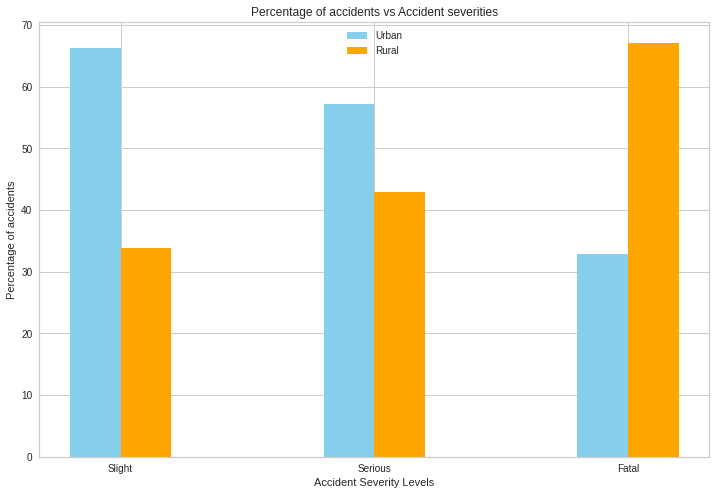

In [ ]:
arr=[]
for i in ['Slight','Serious','Fatal']:
  n=len(data.loc[data['Accident_Severity']==i,'Speed_limit'])
  arr+=[(len(data.loc[(data['Accident_Severity']==i) & (data['Urban_or_Rural_Area']=='Urban'),'Speed_limit'])/n)*100]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_1=pd.DataFrame(data=d)
arr=[]
for i in ['Slight','Serious','Fatal']:
  n=len(data.loc[data['Accident_Severity']==i,'Speed_limit'])
  arr+=[(len(data.loc[(data['Accident_Severity']==i) & (data['Urban_or_Rural_Area']=='Rural'),'Speed_limit'])/n)*100]
d={'Accident_Severity':['Slight','Serious','Fatal'],'Mean':arr}
eng_means_2=pd.DataFrame(data=d)
pt_1=plt.figure(figsize=(12,8))
ax=plt.subplot(1,1,1)
ind=np.arange(3)
plt.bar(ind+0.2,eng_means_1['Mean'],width=0.2,color='SkyBlue',align='center',label='Urban')
plt.bar(ind+0.4,eng_means_2['Mean'],width=0.2,color='Orange',align='center',label='Rural')
ax.set_xticks(ind+0.3)
plt.ylabel('Percentage of accidents')
ax.set_xticklabels( ('Slight','Serious','Fatal') )
plt.xlabel('Accident Severity Levels')
plt.legend()
plt.title('Percentage of accidents vs Accident severities')